<a href="https://colab.research.google.com/github/BhaveshNikam09/Deep_learning_practise/blob/main/BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Batch Normalization (BatchNorm) in Deep Learning**
     
Batch Normalization is a technique used to normalize activations (intermediate outputs) in a neural network, helping to improve training speed, stability, and performance.

🔹 Why Use Batch Normalization?


1.   Stabilizes Training → Reduces internal covariate shift (drastic changes in distribution of activations).

2.   Enables Faster Learning → Allows higher learning rates, speeding up convergence.

3.  Improves Generalization → Acts as a regularizer (reducing overfitting).

4.  Reduces Dependency on Weight Initialization → Networks become less sensitive to initialization strategies.


🔹 When to Use Batch Normalization?

✅ With Deep Networks → Helps prevent vanishing/exploding gradients.

✅ With CNNs & RNNs → Helps smoothen training, though alternatives like LayerNorm exist for RNNs.

✅ When Using Large Learning Rates → Helps stabilize learning.

✅  Avoid Using with Dropout → Both act as regularizers; using them together may hinder learning.




In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/diabetes_dataset.csv')

In [3]:
data.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [41]:
data.isna().sum()

,0
Age,0
Pregnancies,0
BMI,0
Glucose,0
BloodPressure,0
HbA1c,0
LDL,0
HDL,0
Triglycerides,0
WaistCircumference,0


In [28]:
data.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

In [4]:
X=data.iloc[:,:-1]

In [6]:
y=data.iloc[:,-1]

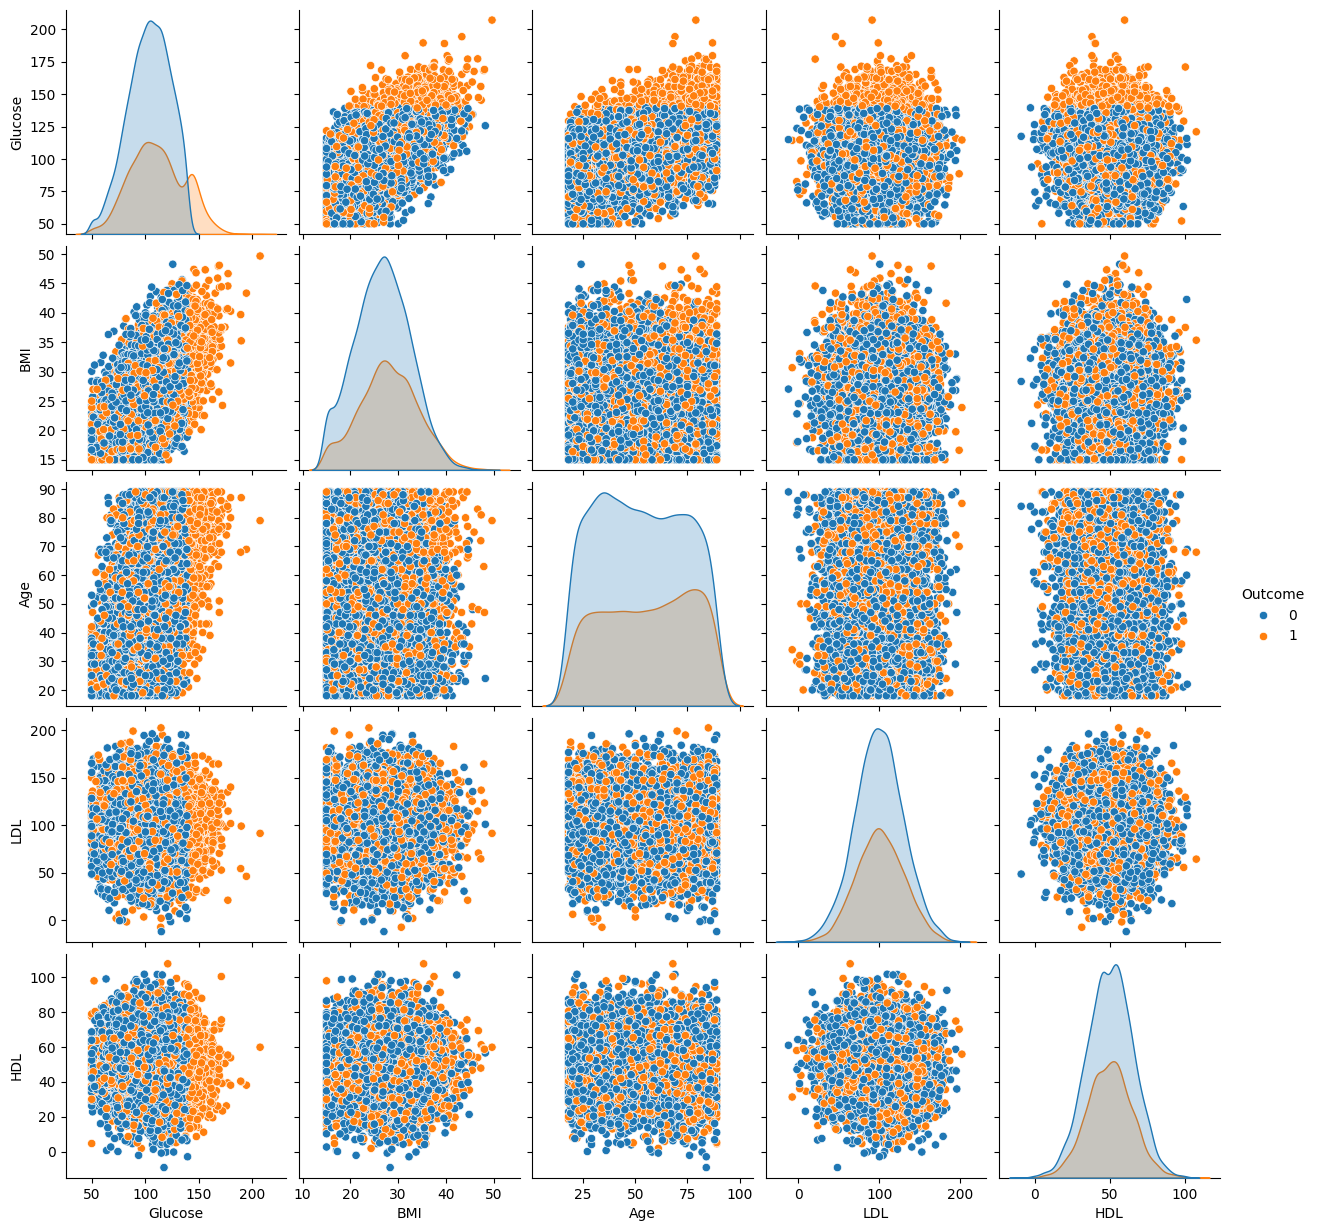

In [35]:
sns.pairplot(data[['Glucose', 'BMI', 'Age', 'LDL', 'HDL', 'Outcome']], hue='Outcome')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
y_train

,Outcome
3427,0
8832,1
4366,1
4937,1
1420,0
...,...
1099,1
2514,0
6637,1
2575,0


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,BatchNormalization

# Without BatchNorm

In [45]:
model1=Sequential()
model1.add(Dense(8,input_dim=X_train.shape[1],activation='relu'))
model1.add(Dense(16))
model1.add(Activation('relu'))
model1.add(Dense(32))
model1.add(Activation('relu'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history=model1.fit(X_train,y_train,epochs=50,validation_split=0.20)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9780 - loss: 0.0517 - val_accuracy: 0.9856 - val_loss: 0.0313
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9846 - loss: 0.0408 - val_accuracy: 0.9758 - val_loss: 0.0582
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9838 - loss: 0.0378 - val_accuracy: 0.9784 - val_loss: 0.0530
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0427 - val_accuracy: 0.9803 - val_loss: 0.0387
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9852 - loss: 0.0372 - val_accuracy: 0.9771 - val_loss: 0.0457
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0397 - val_accuracy: 0.9869 - val_loss: 0.0302
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0372 - val_accuracy: 0.9751 - val_loss: 0.0483
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9824 - loss: 0.0468 - val_accuracy: 0.

In [60]:
predict=model1.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,np.round(predict))

0.989517819706499

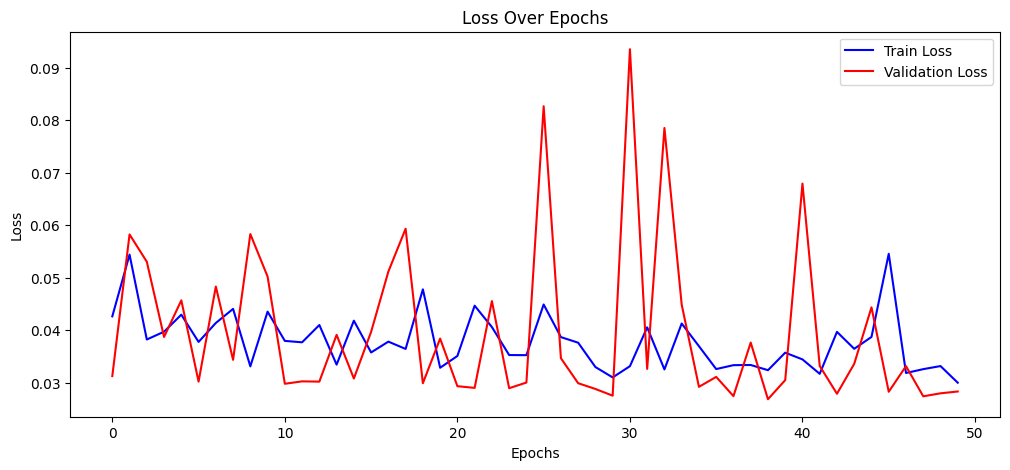

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

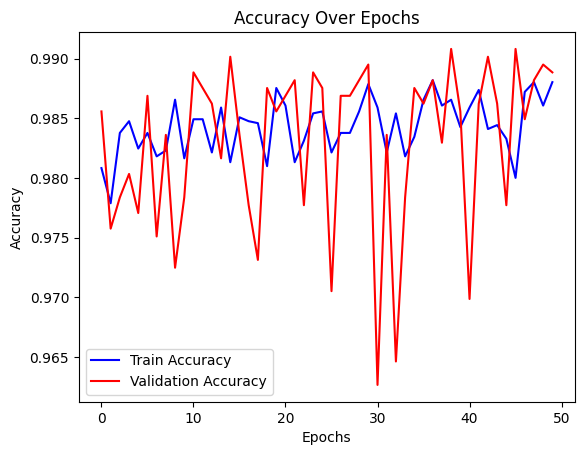

In [65]:
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# By Using the BatchNormalization before activation

In [67]:
model2=Sequential()
model2.add(Dense(16,input_dim=X_train.shape[1]),)
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(32))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history=model2.fit(X_train,y_train,epochs=50,validation_split=0.20)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5487 - loss: 0.7563 - val_accuracy: 0.6324 - val_loss: 0.6572
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6691 - loss: 0.6416 - val_accuracy: 0.6940 - val_loss: 0.6195
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6884 - loss: 0.6128 - val_accuracy: 0.6796 - val_loss: 0.6223
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7052 - loss: 0.6026 - val_accuracy: 0.6822 - val_loss: 0.6220
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7044 - loss: 0.5842 - val_accuracy: 0.6691 - val_loss: 0.6421
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7310 - loss: 0.5429 - val_accuracy: 0.6723 - val_loss: 0.6426
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8281 - loss: 0.3897 - val_accuracy: 0.6573 - val_loss: 0.6270
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9621 - loss: 0.1321 - val_accuracy: 0.

In [70]:
predict=model2.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [71]:
accuracy_score(y_test,np.round(predict))

0.9428721174004193

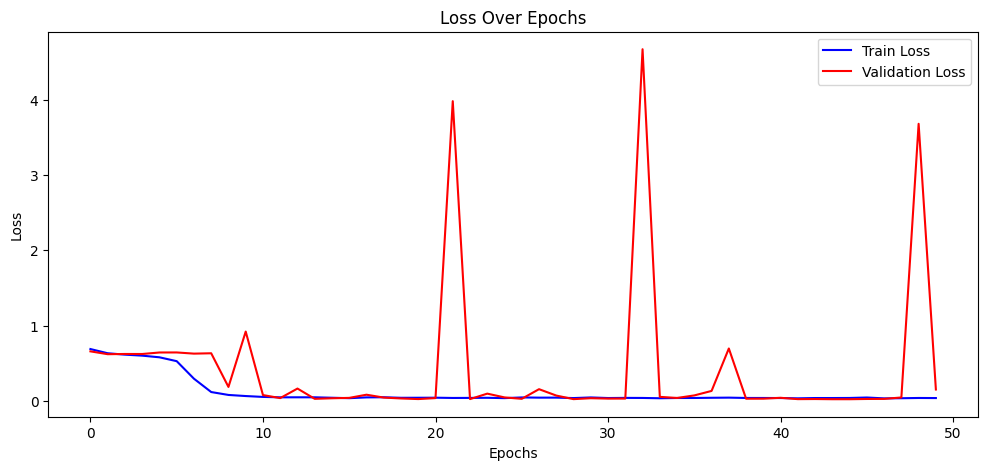

In [72]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

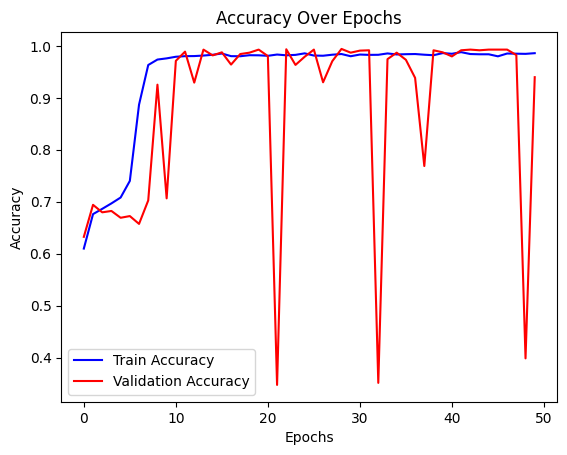

In [73]:
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

From Checking this it is clearly the model is overfitting not having smooth Transition

# **Adding BatchNorm after Activation**

In [87]:
model3=Sequential()
model3.add(Dense(16,input_dim=X_train.shape[1]),)
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Dense(32))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Dense(1,activation='sigmoid'))

In [88]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
history=model3.fit(X_train,y_train,epochs=50,validation_split=0.20)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5446 - loss: 0.7509 - val_accuracy: 0.6782 - val_loss: 0.6489
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6679 - loss: 0.6381 - val_accuracy: 0.6239 - val_loss: 0.6546
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6764 - loss: 0.6270 - val_accuracy: 0.6822 - val_loss: 0.6302
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6846 - loss: 0.6029 - val_accuracy: 0.6121 - val_loss: 0.6544
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7870 - loss: 0.4674 - val_accuracy: 0.3401 - val_loss: 1.9385
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9576 - loss: 0.1858 - val_accuracy: 0.3742 - val_loss: 2.2566
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9723 - loss: 0.0991 - val_accuracy: 0.9679 - val_loss: 0.1189
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9709 - loss: 0.0877 - val_accuracy: 0.

In [77]:
predict=model3.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [78]:
accuracy_score(y_test,np.round(predict))

0.9449685534591195

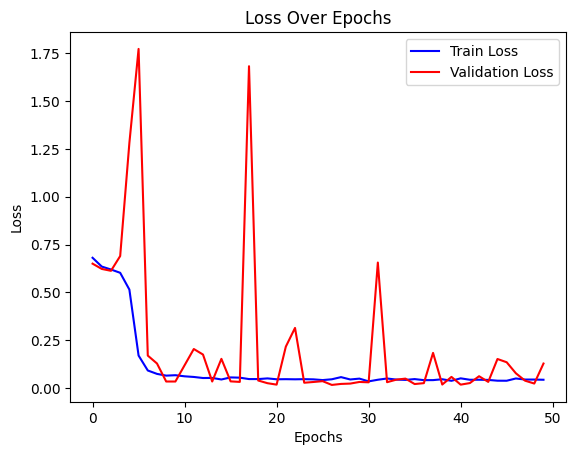

In [79]:
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

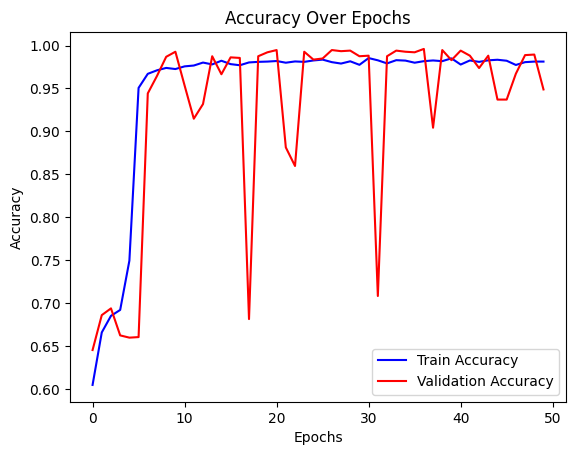

In [80]:
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()